# Examples of Plotting with *pyseas*

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mpcolors
import matplotlib.gridspec as gridspec
from pathlib import Path
import skimage.io
import pandas as pd
import cartopy
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import pyseas.maps as psm
import pyseas.contrib as psc
import pyseas.cm

%matplotlib inline

data_dir = Path(pyseas.__file__).parents[1] / 'doc' / 'data'

## Recomended Style

     import pyseas.maps as psm

## Basic Mapping

Projections can be specified by using any of the names found in the acompanying 
`projection_info.md` document, or with any Cartopy projection. There are built in 
light and dark styles, which are activated using `pyseas.context`.

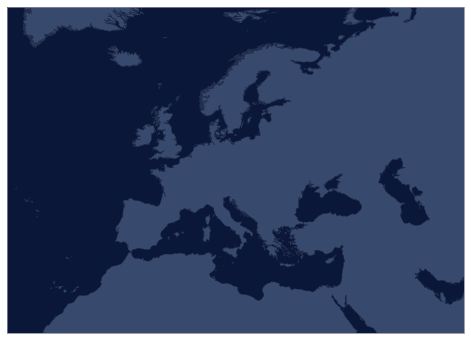

In [20]:
with psm.context(psm.styles.dark):
    fig = plt.figure(figsize=(18, 6))
    psm.create_map(projection='regional.european_union')
    psm.add_land()

In addition to `add_land` there a number of other features that can be added to maps
including eezs, grid_lines, countries, logos, etc. If you add a logo, without specifying
the image to use, you'll get the PySeas logo.

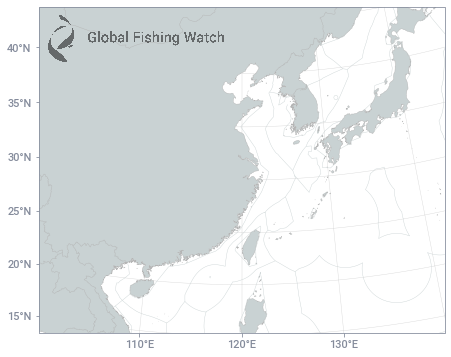

In [21]:
with psm.context(psm.styles.light):
    fig = plt.figure(figsize=(18, 6))
    psm.create_map(projection='country.china')
    psm.add_land()
    psm.add_countries()
    psm.add_eezs()
    psm.add_gridlines()
    psm.add_gridlabels()
    psm.add_logo(loc='upper left')
# plt.savefig('/Users/timothyhochberg/Desktop/pyseas_logo_test.png', dpi=300, 
# facecolor=plt.rcParams['pyseas.fig.background'])

More commonly you'll want to either specify a custom logo as shown here, or set the default
logo as shown below.

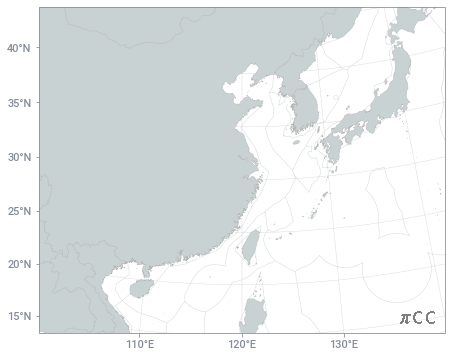

In [22]:
light_logo = skimage.io.imread('../pyseas/data/logos/picc_black.png')

with psm.context(psm.styles.light):
    fig = plt.figure(figsize=(18, 6))
    psm.create_map(projection='country.china')
    psm.add_land()
    psm.add_countries()
    psm.add_eezs()
    psm.add_gridlines()
    psm.add_gridlabels()
    psm.add_logo(light_logo, loc='lower right', scale=0.2)

`set_default_logos` accepts Google Cloud Storage paths prefixed with 
either `gs://` or `gcs://`. Logos loaded this way are locally cached.
For example, if your logos are located at `gs://pyseas/logos/`, you can
use the following:

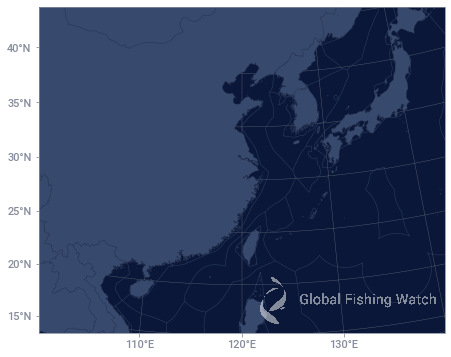

In [23]:
psm.styles.set_default_logos(light_logo='gs://pyseas/logos/logo_black.png', 
                             dark_logo='gs://pyseas/logos/logo_white.png', 
                             scale_adj=1.0, alpha=0.5)

with psm.context(psm.styles.dark):
    fig = plt.figure(figsize=(18, 6))
    psm.create_map(projection='country.china')
    psm.add_land()
    psm.add_countries()
    psm.add_eezs()
    psm.add_gridlines()
    psm.add_gridlabels()
    psm.add_logo(loc='lower right')

If region is not specified, you get the default global map as specified by the 
projection name `global.default`. Currently that's ExactEarth centered at 0 longitude.

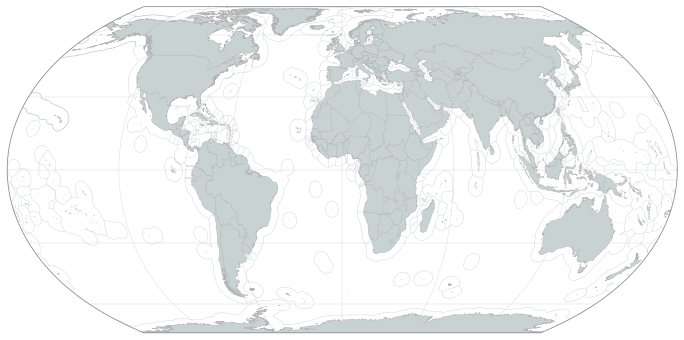

In [24]:
with psm.context(psm.styles.light):
    fig = plt.figure(figsize=(18, 6))
    psm.create_map()
    psm.add_land()
    psm.add_countries()
    psm.add_eezs()
    psm.add_gridlines()
    # Note gridlabels don't currently work on global maps

## Rasters

There are facilities for creating and displaying rasters.

In [25]:
# # Grab some data and create a raster
seismic_presence = pd.read_csv(data_dir / 'seismic_presence_tenth_degree.csv.zip')
seismic_raster = psm.rasters.df2raster(seismic_presence, 'lon_index', 'lat_index', 'hours', 
                                         xyscale=10, origin='lower', per_km2=True)

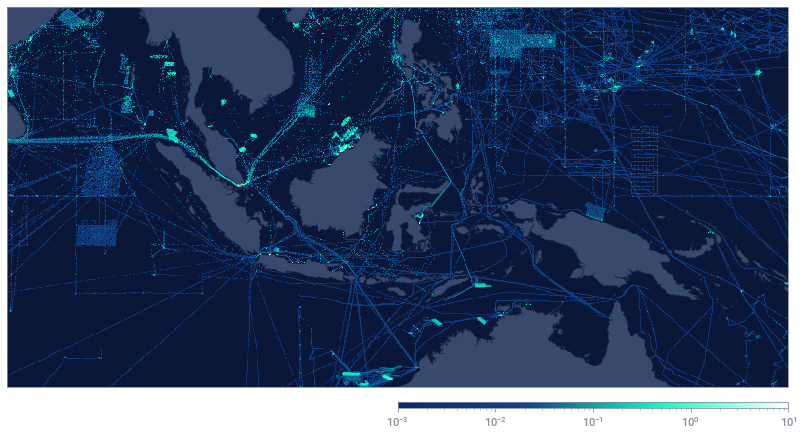

In [26]:
# Display a raster along with standard colorbar.
fig = plt.figure(figsize=(14, 7))
norm = mpcolors.LogNorm(vmin=0.001, vmax=10)
with psm.context(psm.styles.dark):
    with psm.context({'text.color' : 'white'}):
        ax, im = psm.plot_raster(seismic_raster, 
                                  projection='country.indonesia',
                                  cmap='presence',
                                  norm=norm,
                                  origin='lower')
        psm.add_colorbar(im, label=r"hours per $\mathregular{km^2}$",
                        width = .5)

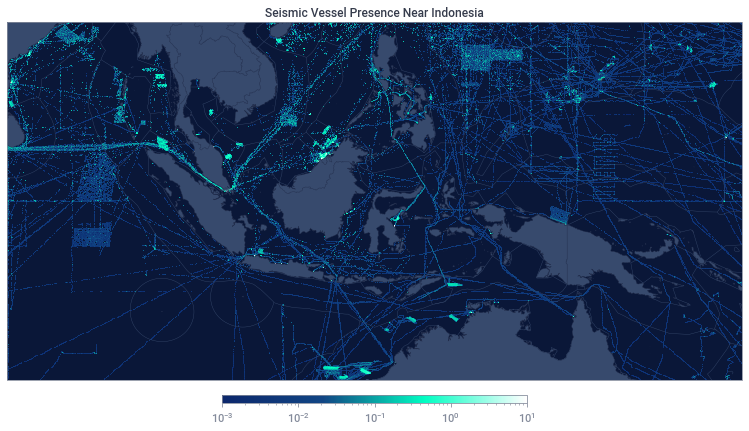

In [27]:
# Display a raster along with standard colorbar.
fig = plt.figure(figsize=(14, 7))
norm = mpcolors.LogNorm(vmin=0.001, vmax=10)
with plt.rc_context(psm.styles.dark):
    ax, im = psm.plot_raster(seismic_raster, 
                              projection='country.indonesia',
                              cmap='presence',
                              norm=norm,
                              origin='lower')
    psm.add_countries()
    psm.add_eezs()
    ax.set_title('Seismic Vessel Presence Near Indonesia')
    fig.colorbar(im, ax=ax, 
                      orientation='horizontal',
                      fraction=0.02,
                      aspect=40,
                      pad=0.04,
                     )

`add_colorbar` can be used with subplots. Here we just plot the same 
thing twice and add a colorbar to the last plot.

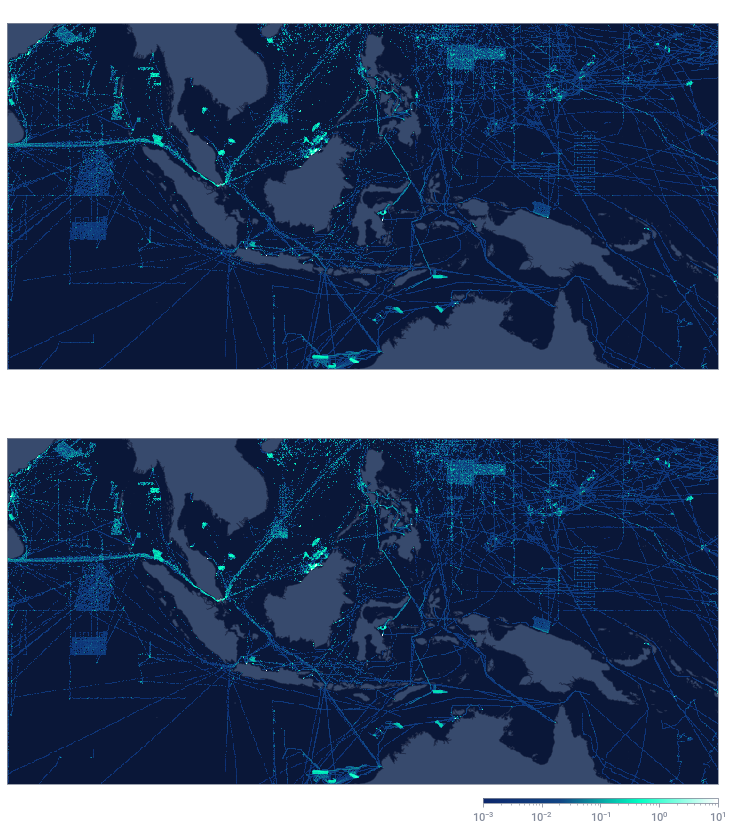

In [28]:
fig = plt.figure(figsize=(14, 14))
norm = mpcolors.LogNorm(vmin=0.001, vmax=10)
gs = gridspec.GridSpec(2, 1)
with plt.rc_context(psm.styles.dark):
    with psm.context({'text.color' : 'white'}):
        for i in range(2):
            ax, im = psm.plot_raster(seismic_raster, 
                                     subplot=gs[i, 0],
                                      projection='country.indonesia',
                                      cmap='presence',
                                      norm=norm,
                                      origin='lower')
            ax.set_title(f'Seismic Vessel Presence Near Indonesia - {i + 1}')
        psm.add_colorbar(im, label=r"hours per $\mathregular{km^2}$ ")

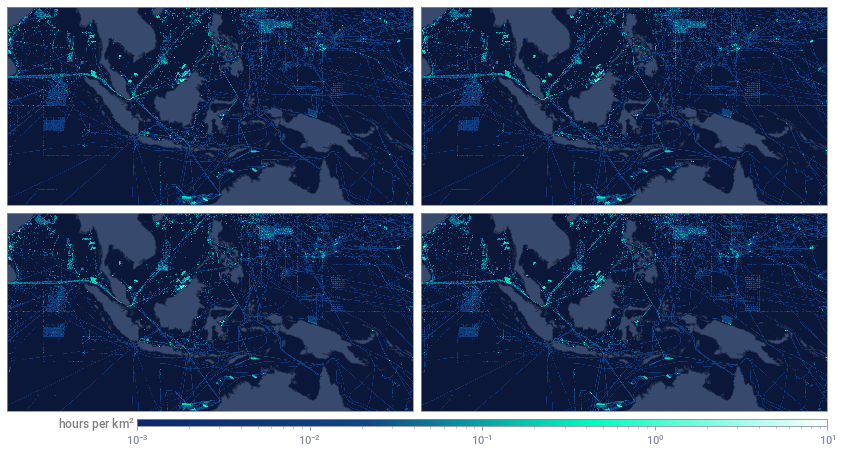

In [29]:
fig = plt.figure(figsize=(14.7, 7.6))
norm = mpcolors.LogNorm(vmin=0.001, vmax=10)
gs = gridspec.GridSpec(2, 2, hspace=0, wspace=0.02)
with plt.rc_context(psm.styles.dark):
    with psm.context({'text.color' : (0.5, 0.5, 0.5)}):
        for i in range(2):
            for j in range(2):
                ax, im = psm.plot_raster(seismic_raster, 
                                         subplot=gs[i, j],
                                          projection='country.indonesia',
                                          cmap='presence',
                                          norm=norm,
                                          origin='lower')
        psm.add_colorbar(im, ax=ax, label=r"hours per $\mathregular{km^2}$", 
                 width=1.7, height=0.035, wspace=0.0025, valign=0.2)

If a grid of maps using the same projection is being plotted, one can instead
use `create_maps`, which mirrors the interface of `plt.subplots`

In [30]:
norm = mpcolors.LogNorm(vmin=0.001, vmax=10)
with plt.rc_context(psm.styles.dark):
    fig, axes = psm.create_maps(2, 2, 
                                projection='country.indonesia',
                                figsize=(14.7, 7.6))
    with psm.context({'text.color' : (0.5, 0.5, 0.5)}):
        for row in axes:
            for ax in row:
                im = psm.add_raster(seismic_raster, 
                                     ax=ax,
                                     cmap='presence',
                                     norm=norm,
                                     origin='lower')
        psm.add_colorbar(im, ax=ax, label=r"hours per $\mathregular{km^2}$", 
                 width=1.7, height=0.035, wspace=0.0025, valign=0.2)
        
        plt.subplots_adjust(hspace=0, wspace=0.02)

AttributeError: module 'pyseas.maps' has no attribute 'create_maps'

In [ ]:
# Display a raster along with standard colorbar.
fig = plt.figure(figsize=(14, 7))
norm = mpcolors.LogNorm(vmin=0.001, vmax=10)
with psm.context(psm.styles.dark):
    with psm.context({'text.color' : 'white'}):
        fig, ax = psm.create_maps(projection='country.indonesia',
                                    figsize=(14.7, 7.6))
        psm.add_raster(seismic_raster,
                       cmap='presence',
                       norm=norm,
                       origin='lower')
        psm.add_colorbar(im, label=r"hours per $\mathregular{km^2}$", loc='bottom')

### H3 Discrete Global Grids

There is also support for rendering data defined in terms of H3 DGG as rasters

N.B. this relies on `h3.unstable`, so might require modification to work in the future.

In [ ]:
fishing_h3_6 = pd.read_csv(data_dir / 'fishing_h3_lvl6.csv.zip')
h3cnts_6_b = {np.uint64(int(x.h3, 16)) : x.cnt for x in fishing_h3_6.itertuples()}

In [ ]:
fig = plt.figure(figsize=(14, 7))
norm = mpcolors.LogNorm(1, 40000)
with psm.context(psm.styles.dark):
    ax, im = psm.plot_h3_data(h3cnts_6_b, 
                              projection=cartopy.crs.LambertAzimuthalEqualArea
                                                   (central_longitude=10, central_latitude=60),
                              extent=(3.8, 25.0, 65.0, 75.4),
                              cmap='presence',
                              norm=norm)
    psm.add_countries()
    psm.add_eezs()
    ax.set_title('H3 data example')
    fig.colorbar(im, ax=ax, 
                      orientation='horizontal',
                      fraction=0.02,
                      aspect=40,
                      pad=0.04,
                     )

## Plotting Tracks

There are two base functions for plotting vessel tracks. `maps.plot` is
a simple wrapper around `plt.plot` that plots tracks specified in lat/lon,
but is otherwise identical `plt.plot`. The alternative, `maps.add_plot` can plot plot tracks
with multiple subsegments, using different styles for each subsegment.

Both of these support creation of legends. However, the second requires a bit
of manual intervention.

In [ ]:
position_msgs = pd.read_csv(data_dir / 'position_messages.csv.zip')
position_msgs['timestamp'] = pd.to_datetime(position_msgs.timestamp)

Note the use of `maps.find_projection` to find an appropriate projection and extents
based on lat/lon data.

In [ ]:
# Simple track plotting analogous to plt.plot
with psm.context(psm.styles.light):
    fig = plt.figure(figsize=(8, 8))
    df = position_msgs[position_msgs.seg_id == '249014000-2018-01-21T16:36:23.000000Z']
    projinfo = psm.find_projection(df.lon, df.lat)
    psm.create_map(projection=projinfo.projection)
    psm.add_land()

    psm.plot(df.lon.values, df.lat.values, label='first')
    psm.plot(df.lon.values, df.lat.values + 0.1, label='second')
    psm.plot(df.lon.values - 0.3, df.lat.values, color='purple', linewidth=3, label='third')
    
    plt.legend()

One can use `add_plot` to display multiple plots at once or to display a single
plot with multiple states. In the first case one uses `break_on_change=False` and
in the second `break_on_change=True`. In either case, the value of the `props`
argument controls the color of plotted line segments. `break_on_change` controls 
how whether lines with a given `props` values are broken when the value changes.

In [ ]:
# Use add plot, to display multiple tracks at once.
with psm.context(psm.styles.light):
    fig = plt.figure(figsize=(8, 8))
    df = position_msgs[position_msgs.ssvid != 220413000]
    projinfo = psm.find_projection(df.lon, df.lat)
    psm.create_map(projection=projinfo.projection, extent=projinfo.extent)
    psm.add_land()
    handles = psm.add_plot(df.lon.values, df.lat.values, df.ssvid, break_on_change=False)
    plt.legend(handles.values(), handles.keys())

In [ ]:
# Use add plot, to display tracks with multiple values
# this simple example leaves gaps between the segments
# Generating an appropriate set of props is a bit tricky --
# here we use the built in fishing props.
with psm.context(psm.styles.light):
    fig = plt.figure(figsize=(8, 8))
    df = position_msgs[position_msgs.ssvid == 413461490]
    projinfo = psm.find_projection(df.lon, df.lat)
    psm.create_map(projection=projinfo.projection, extent=projinfo.extent)
    psm.add_land()
    handles = psm.add_plot(df.lon.values, df.lat.values, df.speed > 7, break_on_change=True,
                            props=psm.styles._fishing_props)
    plt.legend(handles.values(), ['speed <= 7 knots', 'speed > 7 knots'])

## Panels

There are a couple of convenience functions that package up add_plot
for a couple of common cases. These also support adding subsidiary 
time/other-parameter plots and both functions will automatically choses
and appropriate projection and extents based on the input data
using `maps.find_projection`.

The first of these `multi_track_panel` is specialized for plotting multiple
tracks at once.

In [ ]:
df = position_msgs[(position_msgs.ssvid == 413461490)]
with psm.context(psm.styles.panel):
    fig = plt.figure(figsize=(12, 12))
    info = psc.multi_track_panel(df.timestamp, df.lon, df.lat, df.seg_id,
                plots=[{'label' : 'lon', 'values' : df.lon},
                       {'label' : 'lat', 'values' : df.lat}])
    plt.legend(info.legend_handles.values(), [x.split('-', 1)[1].rstrip('.000000000Z') 
                                              for x in info.legend_handles.keys()])

# There is some basic functionality for combining multiple panels as shown below.

In [ ]:
df = position_msgs[(position_msgs.ssvid == 413461490)]
with psm.context(psm.styles.panel):
    fig = plt.figure(figsize=(18, 18))
    gs = gridspec.GridSpec(2, 2)
    
    psc.multi_track_panel(df.timestamp, df.lon, df.lat, df.seg_id,
                plots=[{'label' : 'lon', 'values' : df.lon},
                       {'label' : 'lat', 'values' : df.lat}],
                gs=gs[0, 0], label_angle=-30)
    
    psc.multi_track_panel(df.timestamp, df.lon, df.lat, df.seg_id,
                plots=[{'label' : 'lon', 'values' : df.lon},
                       {'label' : 'lat', 'values' : df.lat}],
                gs=gs[0, 1], label_angle=30)
    
    psc.multi_track_panel(df.timestamp, df.lon, df.lat, df.seg_id,
                plots=[{'label' : 'lon', 'values' : df.speed}],
                gs=gs[1, 0], label_angle=30)
    
    psc.multi_track_panel(df.timestamp, df.lon, df.lat, df.seg_id,
                plots=[{'label' : 'lon', 'values' : df.speed}],
                gs=gs[1, 1], label_angle=30)

In [ ]:
df = position_msgs[(position_msgs.ssvid == 413461490)]
with psm.context(psm.styles.panel):
    fig = plt.figure(figsize=(18, 18))
    gs = gridspec.GridSpec(1, 2, figure=fig)
    
    psc.multi_track_panel(df.timestamp, df.lon, df.lat, df.seg_id,
                plots=[{'label' : 'lon', 'values' : df.lon},
                       {'label' : 'lat', 'values' : df.lat}],
                gs=gs[0])
    
    psc.multi_track_panel(df.timestamp, df.lon, df.lat, df.seg_id,
                plots=[{'label' : 'lon', 'values' : df.lon},
                       {'label' : 'lat', 'values' : df.lat}],
                gs=gs[1])

The second panel type, `track_state_panel`, plots single tracks with multiple states. For instance,
fishing/non-fishing, loitering/non-loitering, etc.

In [ ]:
df = position_msgs[(position_msgs.ssvid == 413461490)].reset_index()
with psm.context(psm.styles.panel):
    fig = plt.figure(figsize=(12, 12))
    info = psc.track_state_panel(df.timestamp, df.lon, df.lat, df.speed > 7.0,
                    plots = [{'label' : 'speed (knots)', 'values' : df.speed, 'min_y' : 0}])

Both panel types have a number of options including `annotations` and
`add_night_shades`.

In [ ]:
df = position_msgs[(position_msgs.ssvid == 413461490)].reset_index()
with psm.context(psm.styles.panel):
    fig = plt.figure(figsize=(12, 12))
    info = psc.track_state_panel(df.timestamp, df.lon, df.lat, df.speed > 7.0,
                                        annotations=5, add_night_shades=True,
                    plots = [{'label' : 'speed (knots)', 'values' : df.speed, 'min_y' : 0}])

## Miniglobe

The miniglobe gets its own section by virtue of being one of the most complex
pieces internally, despite its relative outward simplicity. The miniglobe can
be specified to either have an AOI indicated or a marker at the specified location.

In [ ]:
with psm.context(psm.styles.dark):
    fig = plt.figure(figsize=(10, 10))
    ax = psm.create_map(projection='country.indonesia')
    psm.add_land(ax)
    psm.add_countries(ax)
    psm.add_miniglobe(loc='upper left')
    plt.show()

In [ ]:
with psm.context(psm.styles.dark):
    fig = plt.figure(figsize=(10, 10))
    ax = psm.create_map(projection='country.indonesia')
    psm.add_land(ax)
    psm.add_countries(ax)
    psm.add_miniglobe(loc='lower right', central_marker='*')
    plt.show()

## Plotting Gaps

See [PlotGap.ipynb](https://github.com/GlobalFishingWatch/rendered/blob/master/pyseas/doc/contrib/PlotGap.ipynb)

(or if navigating from within a clone of the repo, go directly to the file [here](contrib/PlotGap.ipynb))

In [ ]:
# plt.savefig('/path/to/file.png', dpi=300, facecolor=plt.rcParams['pyseas.fig.background'])

## Bivariate Rasters

There is basic support for Bivariate plots, although only TransparencyBivariateColormap
has been significantly tested at this time.

In [ ]:
df = pd.read_csv('data/fishing_effort_known_vs_unknown_2020_1deg.csv.zip')
df_all = df[df["fishing_hours_all"].notnull()]
df_known = df[df["fishing_hours_known_vessels"].notnull()]

grid_known = psm.rasters.df2raster(df_known, 'lon_bin', 'lat_bin', 
                                     'fishing_hours_known_vessels', 
                                     xyscale=1, per_km2=True)
grid_total = psm.rasters.df2raster(df_all, 'lon_bin', 'lat_bin', 
                                     'fishing_hours_all', 
                                     xyscale=1, per_km2=True)
grid_ratio = np.divide(grid_known, grid_total, out=np.zeros_like(grid_known), 
                       where=grid_total!=0)

In [ ]:
cmap = psm.cm.bivariate.TransparencyBivariateColormap(psm.cm.bivariate.orange_blue)

with psm.context(psm.styles.dark):
    fig = plt.figure(figsize=(15, 15))
    ax = psm.create_map()
    psm.add_land(ax)

    norm1 = mpcolors.Normalize(vmin=0.0, vmax=1.0, clip=True)
    norm2 = mpcolors.LogNorm(vmin=0.01, vmax=10, clip=True)
    
    psm.add_bivariate_raster(grid_ratio, grid_total, cmap, norm1, norm2)
    
    cb_ax = psm.add_bivariate_colorbox(cmap, norm1, norm2,
                                            xlabel='fraction of matched fishing hours',
                                            ylabel='total fishing hours',
                                            yformat='{x:.2f}',
                                            aspect_ratio=2.0)

## Saving Plots

Plots can be saved in the normal way, using `plt.savefig`. If a background
is needed, the standard facecolor can be applied as shown below.

In [ ]:
# df_known.to_csv('data/fishing_effort_know_vs_unknown.csv.zip')